#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [1]:
# Import sys so we can import custom packages without error
import sys
sys.path.append('../')

In [2]:
# Import Pandas and Numpy to deal with DataFrames and NaN
import pandas as pd
import numpy as np

# Import Visualizer
from src.modules.figure_generation import *

In [3]:
# Import function that determines time of day based on arr_time and dep_time columns
from src.modules.data_preprocessing import time_of_day

In [4]:
# Pull the data from csv by concatenating current working directory with
# '/data/flights_10000.csv'
data = pd.read_csv('../data/flights_10000.csv')

In [4]:
#Define a taxi dataframe that only has relevant information
#Drop NaN to remove cancellation flights
df_taxi = data.loc[:,['tail_num', 'crs_dep_time', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'crs_arr_time']].dropna().reset_index()

In [5]:
#New column to categorize Morning, Afternoon, Evening, Nite
df_taxi['dep_time_of_day'] = df_taxi.apply(lambda df: time_of_day(df, method='dep'), axis=1)
df_taxi['arr_time_of_day'] = df_taxi.apply(lambda df: time_of_day(df, method='arr'), axis=1)

In [6]:
df_taxi['dep_time_of_day'].value_counts()

Morning      4093
Afternoon    2870
Evening      2202
Night         668
Name: dep_time_of_day, dtype: int64

In [7]:
#Add a counter column to return a count of flights in our groupby 
df_taxi['counter'] = 1

In [8]:
#Group departures based on their time_of_day value
departure_group = df_taxi.groupby('dep_time_of_day')[['taxi_out', 'counter']].sum().reset_index()

In [9]:
# Sort this based on taxi_out times
departure_group.sort_values('taxi_out', ascending=False)

,dep_time_of_day,taxi_out,counter
2,Morning,72141.0,4093
0,Afternoon,48919.0,2870
1,Evening,40184.0,2202
3,Night,10811.0,668


In [10]:
#Repeat these for arrival group
arrival_group = df_taxi.groupby('arr_time_of_day')[['taxi_in', 'counter']].sum().reset_index()
arrival_group.sort_values('taxi_in', ascending=False)

,arr_time_of_day,taxi_in,counter
2,Morning,23429.0,2883
0,Afternoon,21208.0,2916
1,Evening,18591.0,2315


#### Visualize the different taxi time weights with pie charts

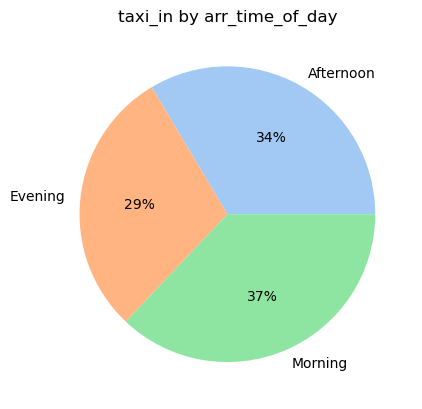

In [13]:
# ARRIVAL TAXI
make_pie(arrival_group, 'taxi_in', 'arr_time_of_day')

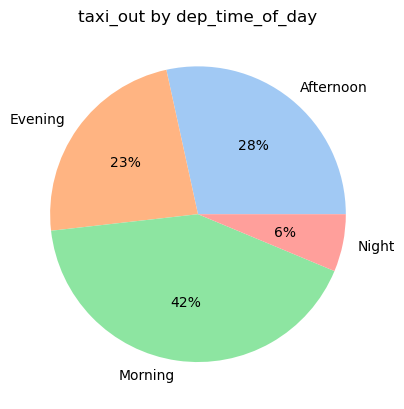

In [14]:
# DEPARTURE TAXI
make_pie(departure_group, 'taxi_out', 'dep_time_of_day')